In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df_train = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
# Visualize random products
training = np.asarray(df_train.drop('label', axis=1))
train_label = np.asarray(df_train['label'])

testing = np.asarray(df_test.drop('label', axis=1))
test_label = np.asarray(df_test['label'])

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
set(train_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

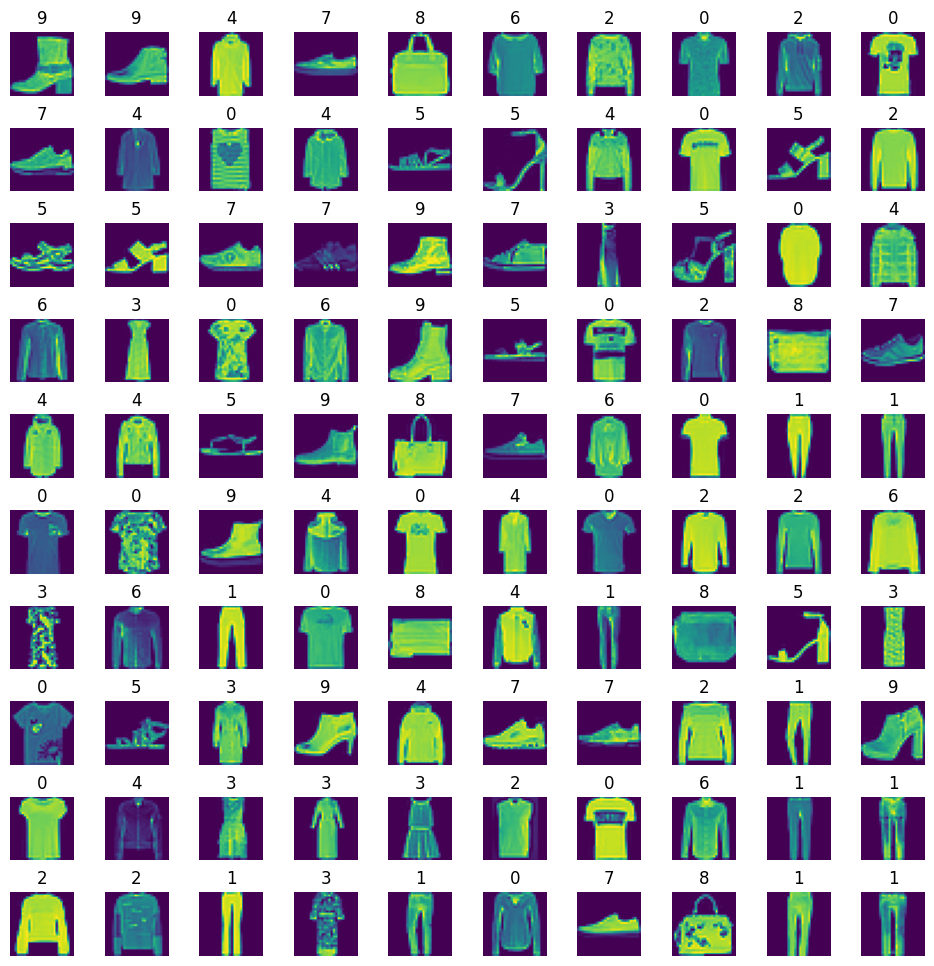

In [6]:
nrows = 10
ncols = 10
n = len(training)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))

for i in range(nrows):
    for j in range(ncols):
        index = random.randint(0, n)
        axes[i][j].imshow(training[index].reshape(28, 28))
        axes[i][j].set_title(train_label[index])
        axes[i][j].axis("off")
plt.subplots_adjust(hspace=0.5)

In [7]:
training = training/255

In [8]:
testing = testing/255

In [9]:
training.shape

(60000, 784)

In [10]:
training = np.reshape(training, (-1, 28, 28, 1))
testing = np.reshape(testing, (-1, 28, 28, 1)) 

In [11]:
testing.shape

(10000, 28, 28, 1)

In [12]:
# Split the data into train and val data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(training, train_label, test_size=0.2, random_state=1)

In [13]:
x_train.shape

(48000, 28, 28, 1)

In [14]:
# Model creation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 65s 42ms/step - loss: 0.5200 - accuracy: 0.8105 - val_loss: 0.4017 - val_accuracy: 0.8529
Epoch 2/5
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3587 - accuracy: 0.8701 - val_loss: 0.3364 - val_accuracy: 0.8754
Epoch 3/5
1500/1500 [==============================] - 62s 42ms/step - loss: 0.3127 - accuracy: 0.8857 - val_loss: 0.2838 - val_accuracy: 0.8996
Epoch 4/5
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2794 - accuracy: 0.8967 - val_loss: 0.2741 - val_accuracy: 0.9003
Epoch 5/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2593 - accuracy: 0.9028 - val_loss: 0.2708 - val_accuracy: 0.9013


In [19]:
model.evaluate(testing, test_label)

313/313 [==============================] - 4s 11ms/step - loss: 0.2611 - accuracy: 0.9047


[0.2610602378845215, 0.904699981212616]

In [20]:
y_pred = np.argmax(model.predict(testing), axis=-1)

313/313 [==============================] - 3s 9ms/step


In [21]:
#Visualize the prediction

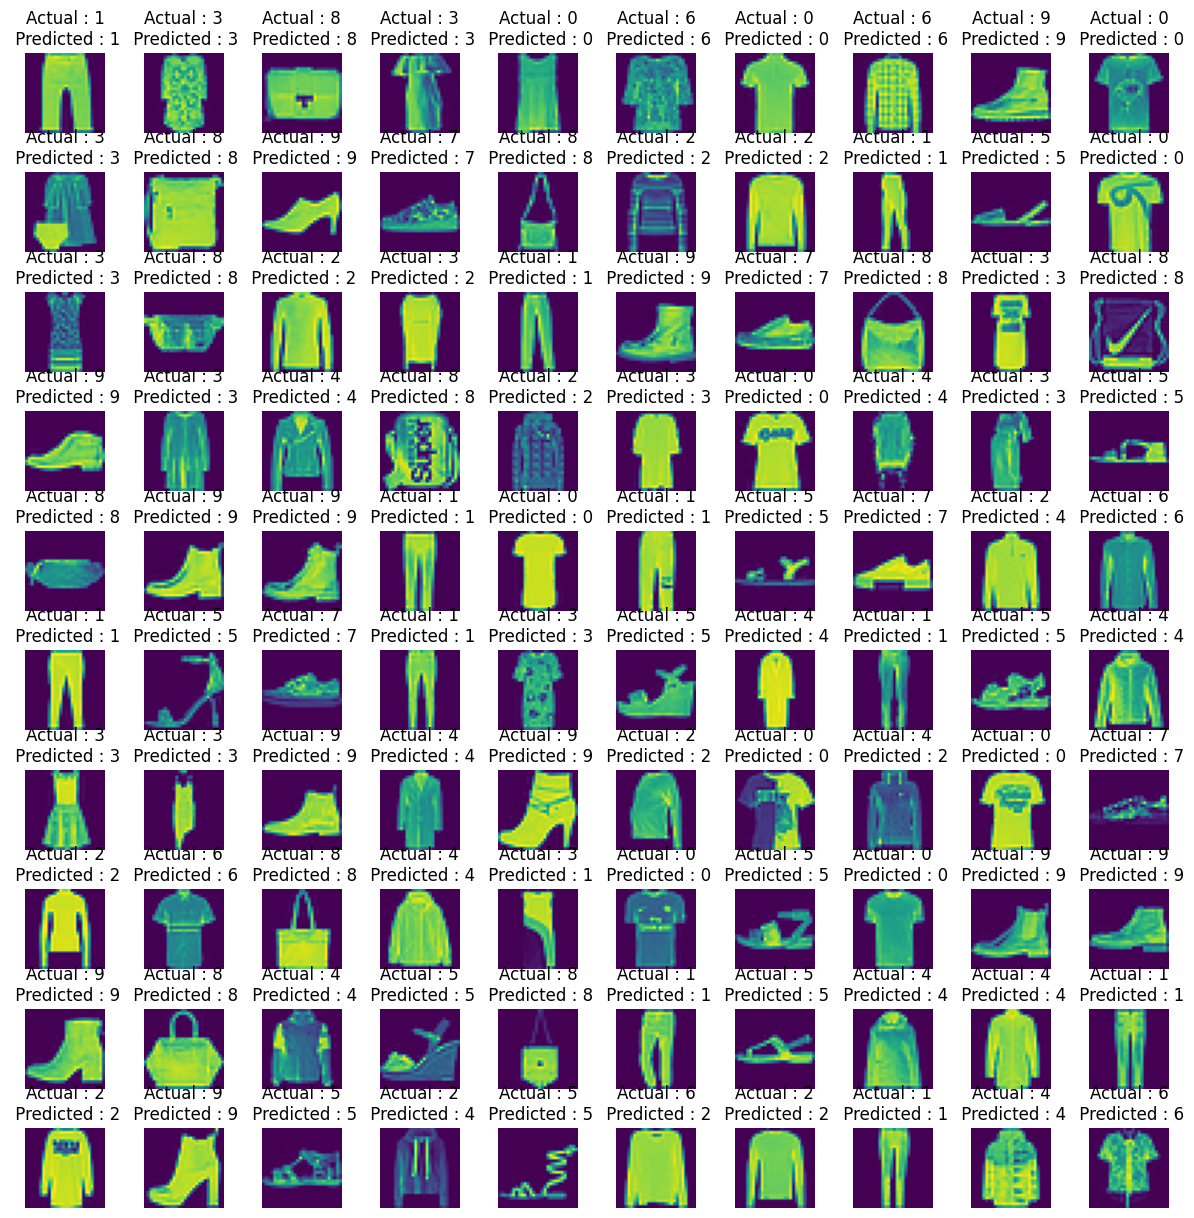

In [22]:
nrows = 10
ncols = 10

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        index = random.randint(0, len(testing))
        axes[i][j].imshow(testing[index].reshape(28, 28))
        axes[i][j].set_title("Actual : {:d}\n Predicted : {:d}".format(test_label[index], y_pred[index]))
        axes[i][j].axis("off")
plt.subplots_adjust(hspace=0.5)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.90      0.85      1000
           3       0.91      0.94      0.92      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.85      0.57      0.68      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

